In [13]:
import proplot as pplt
import matplotlib as plt
import numpy as np
from sklearn.linear_model import TheilSenRegressor
import matplotlib.patches as patches
import pandas as pd

In [14]:
winter = pd.read_csv('./Data/Winter_Harvest.csv')
winter = winter.melt(id_vars=['doy']).dropna().reset_index()
winter['variable'] = winter['variable'].apply(int)
harvest_mask = winter['variable'] == 2020 

## Winter Harvesting

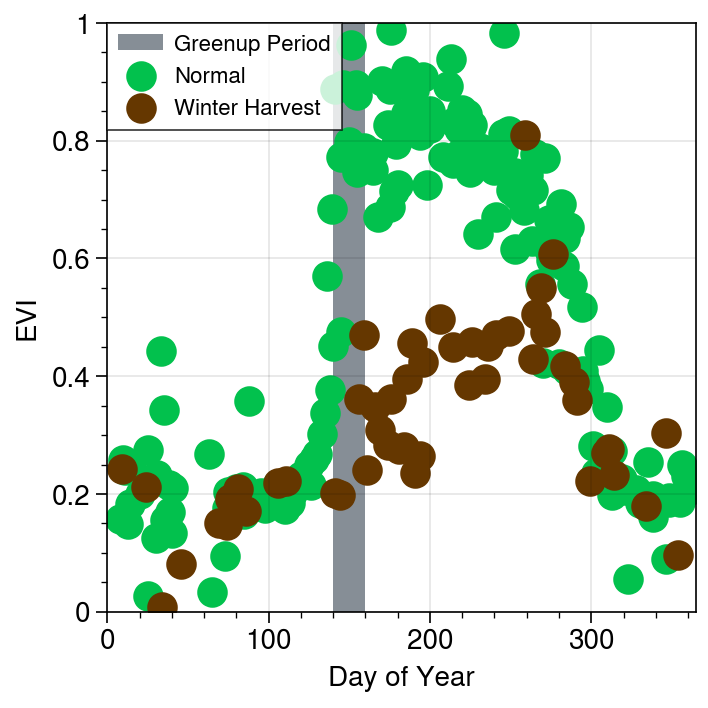

In [16]:
fig, ax = pplt.subplots(figsize=('90mm','90mm'), share=False, facecolor='none', fontsize=10)

ax.scatter(winter.loc[~harvest_mask, 'doy'], winter.loc[~harvest_mask, 'value'], linewidth=5, label='Normal', color='shamrock green')
ax.scatter(winter.loc[harvest_mask, 'doy'], winter.loc[harvest_mask, 'value'],    linewidth=5, label='Winter Harvest', color='brown')

# Normal SOS/EOS
#rect = patches.Rectangle((150, 0), 140, 1, facecolor='lightgray', label='Typical Growing Season', zorder=0)
#ax.add_patch(rect)

# Winter Harvesting SOS/EOS
rect = patches.Rectangle((140, 0), 20, 1, facecolor='gray6', label='Greenup Period', zorder=0)
ax.add_patch(rect)

pplt.rc['legend.fontsize'] = 8 # Note, proplot is dumb so we need to manually set fontsize.
ax.legend(ncols=1, loc='ul')
ax.format(ylim=[0,1], ylabel='EVI',
          xlim=[0, 365], xlabel='Day of Year')
fig.savefig('./Figures/Data_Winter_Harvesting.png')

## Defoliation

In [5]:
defol = pd.read_csv('./Data/Severe_Defol.csv')
defol = defol.melt(id_vars=['doy']).dropna().reset_index()
defol['variable'] = defol['variable'].apply(int)
defol_mask = defol['variable'] == 2021

In [6]:
defol.loc[~defol_mask, 'value']

52     0.096
53     0.217
54     0.154
55     0.176
56     0.161
       ...  
207    0.211
208    0.241
209    0.186
210    0.039
211    0.192
Name: value, Length: 160, dtype: float64

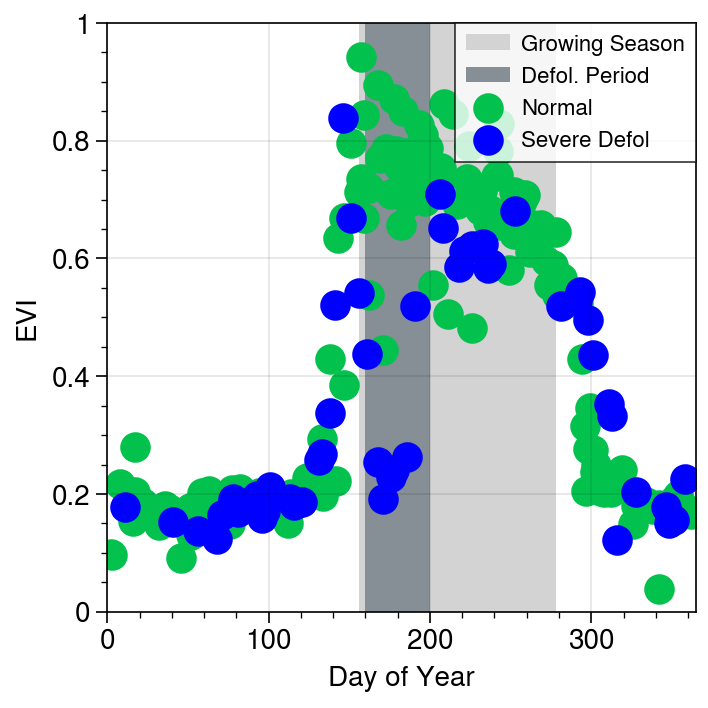

In [7]:
fig, ax = pplt.subplots(figsize=('90mm','90mm'), share=False, facecolor='none', fontsize=10)

ax.scatter(defol.loc[~defol_mask, 'doy'], defol.loc[~defol_mask, 'value'], linewidth=5, label='Normal', color='shamrock green')
#ax.plot(x, slight_defol, linewidth=5, label='Slight Defol', color='yellow orange')
ax.scatter(defol.loc[defol_mask, 'doy'], defol.loc[defol_mask, 'value'], linewidth=5, label='Severe Defol', color='blue')

doy_min = 156
doy_max = 278
# SOS/EOS
rect = patches.Rectangle((doy_min, 0), doy_max - doy_min, 1, facecolor='lightgray', label='Growing Season', zorder=0)
ax.add_patch(rect)

# Defoliation Period
rect = patches.Rectangle((160, 0), 40, 1, facecolor='gray6', label='Defol. Period', zorder=0)
ax.add_patch(rect)

pplt.rc['legend.fontsize'] = 8 # Note, proplot is dumb so we need to manually set fontsize.
ax.legend(ncols=1, loc='ur')
ax.format(ylim=[0, 1], ylabel='EVI',
          xlim=[0, 365], xlabel='Day of Year')
fig.savefig('./Figures/Data_Defoliation.png')

## Seasonal Trends

In [8]:
slope = -0.0010300187168904816
offset = 0.9250908551069817

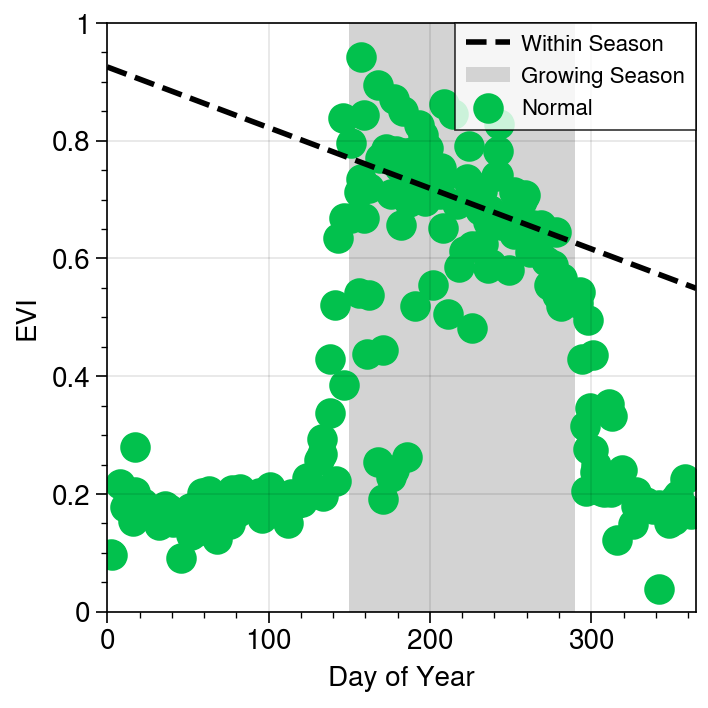

In [9]:
fig, ax = pplt.subplots(figsize=('90mm','90mm'), share=False, facecolor='none', fontsize=10)

ax.scatter(defol['doy'], defol['value'], linewidth=5, label='Normal', color='shamrock green')

x = np.linspace(0, 365)
y = slope*x + offset
ax.plot(x, y, linewidth=2, color='black', linestyle='dashed', label='Within Season')

# SOS/EOS
rect = patches.Rectangle((150, 0), 140, 1, facecolor='lightgray', label='Growing Season', zorder=0)
ax.add_patch(rect)

pplt.rc['legend.fontsize'] = 8 # Note, proplot is dumb so we need to manually set fontsize.
ax.legend(ncols=1, loc='ur')
ax.format(ylim=[0, 1], ylabel='EVI',
          xlim=[0, 365], xlabel='Day of Year')
fig.savefig('./Figures/Data_Normal.png')

## Anomaly

In [10]:
defol['pred'] = slope*defol['doy'] + offset
defol['anom'] = defol['value'] - defol['pred']

In [11]:
doy_mask = (defol['doy'] >= 160) & (defol['doy'] <= 200)
healthy = defol.loc[(~defol_mask) & doy_mask, 'anom'].mean()
defoliated = defol.loc[defol_mask & doy_mask, 'anom'].mean()

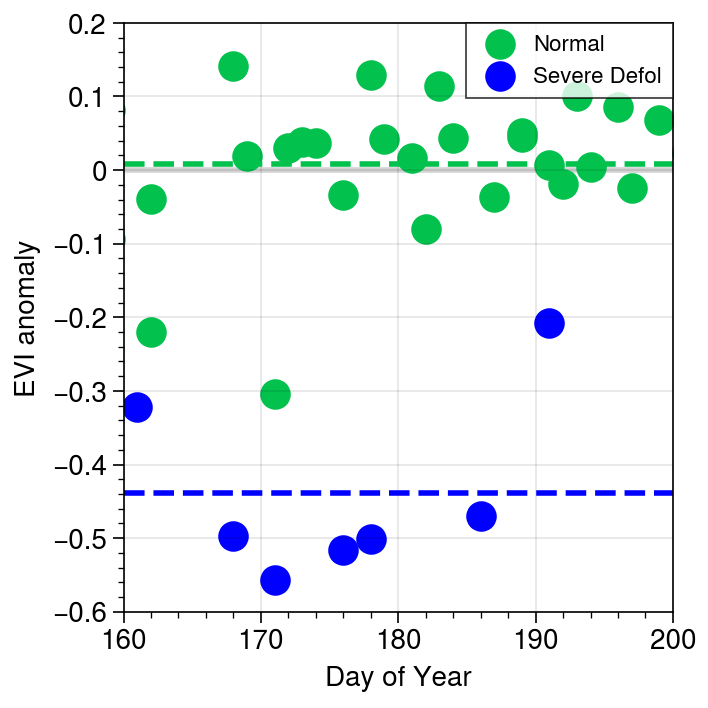

In [12]:
fig, ax = pplt.subplots(figsize=('90mm','90mm'), share=False, facecolor='none', fontsize=10)

ax.scatter(defol.loc[~defol_mask, 'doy'], defol.loc[~defol_mask, 'anom'], linewidth=5, label='Normal', color='shamrock green')
#ax.plot(x, slight_defol, linewidth=5, label='Slight Defol', color='yellow orange')
ax.scatter(defol.loc[defol_mask, 'doy'], defol.loc[defol_mask, 'anom'], linewidth=5, label='Severe Defol', color='blue')

ax.hlines(0, 160, 200, color='lightgray', linewidth=2, zorder=0)
ax.hlines(healthy, 160, 200, color='shamrock green', linestyle='dashed', linewidth=2)
ax.hlines(defoliated, 160, 200, color='blue', linestyle='dashed', linewidth=2)

pplt.rc['legend.fontsize'] = 8 # Note, proplot is dumb so we need to manually set fontsize.
ax.legend(ncols=1, loc='ur')
ax.format(ylim=[-0.6, 0.2], ylabel='EVI anomaly',
          xlim=[160, 200], xlabel='Day of Year')
fig.savefig('./Figures/Data_Anomaly.png')